<font color=green>To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.</font>

# Python Programming: Advanced SVM 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

## Example: Recipe Classification (with multiple classes: 3 classes) 

Let's revisit the recipe classification example we had in the previous session. Instead of classifying two classes, we are going to classify 3 classes, which are muffins, cupcakes and scones.

In [2]:
# Loading data
recipes = pd.read_csv('http://bit.ly/muffins_cupcakes_scone')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


C:\Users\ronal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


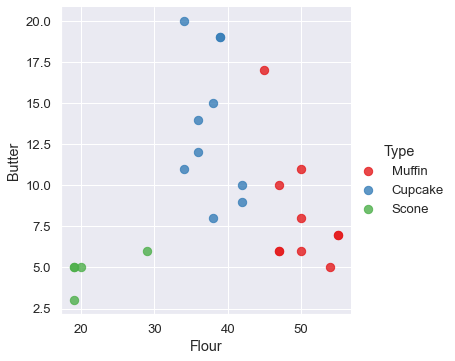

In [3]:
# Plotting our desired features
sns.lmplot('Flour','Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


**Fitting the Model**

In [7]:
# Specify the input for the model
sugar_butter = recipes[['Flour', 'Butter']].values

# Convert the data type for 'Type' column from object to category
recipes['Type'] = recipes['Type'].astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
type_label =recipes['Type'].cat.codes
print(type_label)


# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(sugar_butter,type_label)



0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    2
21    2
22    2
23    2
24    2
dtype: int8


**Visualization**

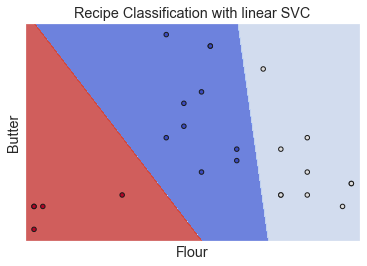

In [8]:





# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Recipe Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = sugar_butter[:, 0], sugar_butter[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=type_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Butter')
ax.set_xlabel('Flour')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Prediction**

In [9]:
# FUnction that predict whether a recipe is a muffin, cupcake or a scone
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a cupcake recipe!')
    elif(model.predict([[flour,sugar]]))==1:
        print('You\'re looking at a muffin recipe!')
    else:
      print('You\'re looking at a scone recipe!')

# Predict if 60 parts flour and 30 parts butter
muffin_or_cupcake(60, 30)

You're looking at a muffin recipe!


## Example 2: Flower Classification (with multiple classes and Kernel trick)

In this example we are use the all ffamous Iris dataset to classify flowers into 3 classes; Setosa, Versicolor and Virginica. We are also going to implement SVM using 3 kernel functions; polynomial, radial basis function (rbf) and sigmoid. Finally, we are going to do a comparison of the kernel performance.
Well,let's get into it!!

In [10]:
# Loading data
iris_data = pd.read_csv('http://bit.ly/Iris_flower_data')
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Exploration**

In [12]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimencional plane because the dataset has 4 features. 
# Therefore we need to reduce the feature by applying a reduction algorithm.

# Removing the target column
iris = iris_data.drop('Class', axis=1)
y = iris_data['Class']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(iris)
X = pca.transform(iris)
X.shape
X

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

**Split the data into train and test sets**

In [13]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Fitting the model: Polymomial function

In [16]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
#gamma='auto_derecated'
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

**Visualization**

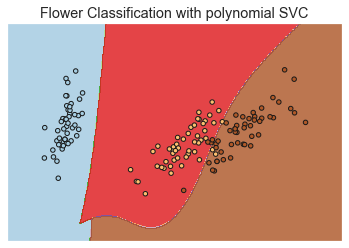

In [17]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Optimization: Parameter tuning**

For non-linear kernel, we use the gamma parameter to improve the perfomance.A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting.
Try playing around with the value of gamma and notice what happens

**Making Predictions**

In [18]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [19]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9666666666666667
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


### Fitting the model: Radial basis function (rbf)

In [20]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC()

**Visualization**

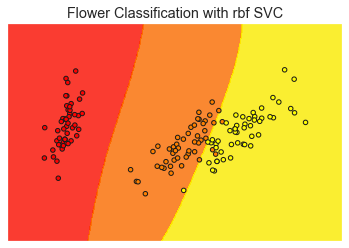

In [21]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

**Optimization: Parameter tuning**

Just like with polynomial, play around with the gamma parameter to get a feel of how it works

In [22]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [23]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


### Fitting the model: Sigmoid function

In [24]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

**Visualization**

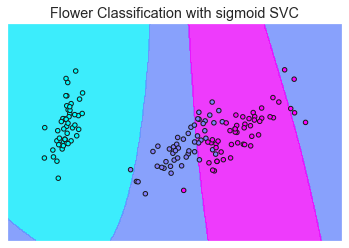

In [25]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [26]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [27]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8
[[11  0  0]
 [ 0  7  6]
 [ 0  0  6]]


**Comparison of the Kernel Performance**

When we compare the performance of the three kernel, it clear that sigmoid performs the worst. This is because the sigmoid function returns two values, 0 and 1 hence its more suited to binary classification problems.

On the other hand, we can see that the rbf kernel also know as **Gaussian Kernel** achieved a 100% prediction rate. However, there is no set rule as to which kernel to use for which scenario. the rule of thumb is that you should test all kernels and select the one that performs the best on your dataset

## <font color=green> Challenge 1</font>

In [ ]:
# You are given a glass dataset, use svm to classify the glasses into the following classes; 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps
# ----------------- 
# Dataset url -------> http://bit.ly/glass_classification
# ------------------
Your code goes here

## <font color=green>Challenge 2</font>

In [ ]:
# Given the following dataset, classify the wine into either of the three categories
# ---------
# Dataset ------> http://bit.ly/wine_varieties
# --------
Your code goes here

## <font color=green>Challenge 3</font>

In [ ]:
# Given the following dataset, use svm to classify the seed into the three categories
# ---------------
# Dataset url --------> http://bit.ly/seeds_dataset
# -----------------